In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def sigmoid(x,gamma=0):
  return 1/(1+np.exp(-1*gamma*x))
def testing(xs,thres,lo,hi):
    return list(map(lambda x:hi if x>=thres else lo,xs))
def testingSigmoid(x,thres,lo,hi,gamma):
   return (hi-lo)*sigmoid(x-thres,gamma)+lo
def draw2Func(f,g):
    ps = np.linspace(-10,10.0,num=100)
    ys = f(ps)
    ys2 = g(ps)
    fig,ax = plt.subplots(1,1,sharey=True)
    ax.plot(ps,ys,'ro-',label='Step')
    ax.set(xlabel=r'x', ylabel='f(x)',
               title=f'')

    ax.plot(ps,ys2,'go-',label='Sigmoid')
    plt.legend()
    #plt.grid()
    #plt.show()
    #plt.savefig('./sigmoid.pdf')

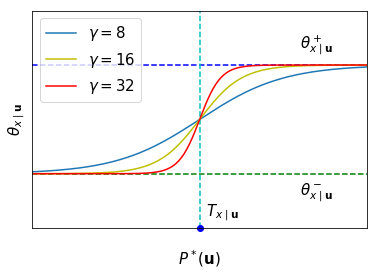

In [5]:
plt.rc('font',**{'size':15})
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_xlim(0,1)
ax.set_ylim(-0.5,1.5)
ax.set(xlabel=r'$P^*(\mathbf{u})$',ylabel=r'$\theta_{x\mid\mathbf{u}}$')
xs = np.linspace(-2,2,num=500)
theta_p = 1
theta_n = 0
thres = 0.5
ys = testingSigmoid(xs,thres,theta_n,theta_p,8)
ys2 = testingSigmoid(xs,thres,theta_n,theta_p,16)
ys3 = testingSigmoid(xs,thres,theta_n,theta_p,32)
#ys = sigmoid(xs)

ax.xaxis.labelpad = 20
ax.xaxis.axis_label_text_font_size = '20pt'
plt.xticks([], [])
plt.yticks([], [])
plt.axhline(y=theta_p, color='b', linestyle='--')
plt.axhline(y=theta_n, color='g', linestyle='--')
plt.axvline(x=thres,color='c',linestyle='--')
ax.plot(xs,ys,label=r'$\gamma=8$')
ax.plot(xs,ys2,'y',label=r'$\gamma=16$')
ax.plot(xs,ys3,'r',label=r'$\gamma=32$')
ax.plot([thres],[-0.5],'bo',clip_on=False)
ax.annotate('$\\theta^+_{x\\mid\\bf{u}}$', xy=(0, 1), xytext=(0.8,theta_p+0.15),
            )
ax.annotate('$\\theta^-_{x\\mid\\bf{u}}$', xy=(0, 1), xytext=(0.8,theta_n-0.2),
            )
#ax.annotate('$T$', xy=(0, 1), xytext=(thres,-1),
            #)
ax.annotate('$T_{x\\mid\\mathbf{u}}$', xy=(0, 1), xytext=(0.52,-0.4),fontsize=15
            )
#plt.show()
#ax.yaxis.label.set_size(15)
plt.legend(loc=2)
plt.savefig('sigmoidVis3.pdf')